We have the min and max temperatures in a city In India for each months of the year.
We would like to find a function to describe this and show it graphically, the dataset
given below.
Task:
1.fitting it to the periodic function
2.plot the fit
Data
Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25
Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18
Expected Output:


In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

city_max=np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
city_min=np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])

months=np.arange(12)
plt.plot(months,city_max,'ro')
plt.plot(months,city_min,'bo')
plt.xlabel('Months')
plt.ylabel('Min & Max Temp')


Text(0, 0.5, 'Min & Max Temp')

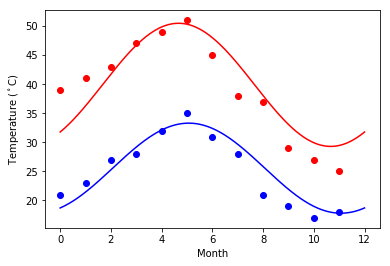

In [5]:
from scipy import optimize

def yearly_temp(times, avg, amp, time_offset):
    return (avg+ amp * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temp, months,
                                      city_max, [20, 10, 0])
res_min, cov_min = optimize.curve_fit(yearly_temp, months,
                                      city_min, [-40, 20, 0])

#Plotting
days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(months, city_max, 'ro')
plt.plot(days, yearly_temp(days, *res_max), 'r-')
plt.plot(months, city_min, 'bo')
plt.plot(days, yearly_temp(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()

Matplotlib:
This assignment is for visualization using matplotlib:
data to use:
url=https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv
titanic = pd.read_csv(url)
Charts to plot:
1. Create a pie chart presenting the male/female proportion
2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

Male Female counts in the Titanic 843,466 respectively


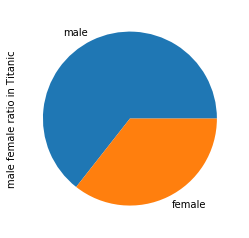

In [6]:
#1. Create a pie chart presenting the male/female proportion

url='https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv'
titanic = pd.read_csv(url)
titanic.head()

count=0
print("Male Female counts in the Titanic {},{} respectively".format(titanic["sex"].value_counts().male,titanic["sex"].value_counts().female))
sex_counts=np.array([titanic["sex"].value_counts().male,titanic["sex"].value_counts().female])
series = pd.Series(sex_counts,index=['male','female'],name='male female ratio in Titanic')
series.plot.pie()




In [9]:
#2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

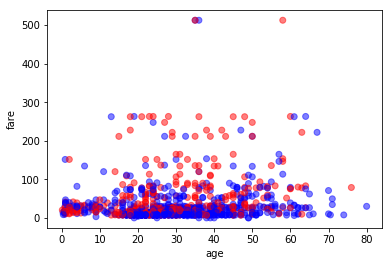

In [12]:
titanic = titanic.dropna(subset=['sex'])

mapping = {'male' : 'blue', 'female' : 'red'}
plt.scatter(titanic['age'], titanic['fare'], alpha=0.5, c=titanic['sex'].map(mapping))
plt.xlabel("age")
plt.ylabel("fare")
plt.show()